<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-9:-Path-Planning,-Control,-Kinematics:-Due-Monday,-November-28-at-midnight" data-toc-modified-id="Assignment-9:-Path-Planning,-Control,-Kinematics:-Due-Monday,-November-28-at-midnight-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assignment 9: Path Planning, Control, Kinematics: Due Monday, November 28 at midnight</a></span><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Reading-Assignment" data-toc-modified-id="Reading-Assignment-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Reading Assignment</a></span></li><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Requirements</a></span></li><li><span><a href="#Deliverables" data-toc-modified-id="Deliverables-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Deliverables</a></span><ul class="toc-item"><li><span><a href="#Simulation-1-Video-(10-points)" data-toc-modified-id="Simulation-1-Video-(10-points)-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Simulation 1 Video (10 points)</a></span></li><li><span><a href="#Simulation-2-Video-(5-points)" data-toc-modified-id="Simulation-2-Video-(5-points)-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Simulation 2 Video (5 points)</a></span></li><li><span><a href="#Writeup-(10-points)" data-toc-modified-id="Writeup-(10-points)-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Writeup (10 points)</a></span></li></ul></li></ul></li></ul></div>

# Assignment 9: Path Planning, Control, Kinematics: Due Monday, November 28 at midnight

Throughout the semester, you have developed some impressive skills for your Romi robot. For example, we've studied:
* How to organize Romi's behavior using a Finite State Machine.
* How to model its dynamics with a physics-based differential equation.
* How to describe its motion in the world using forward and inverse kinematics.
* How a Romi can perceive its own motion using odometry.
* How it can plan a path in its environment given a known, trusted map.
* How it might follow that path using feedback control.

You will put these skills to use now to allow your Romi to play a game of fetch! The arena for this assignment is shown below:

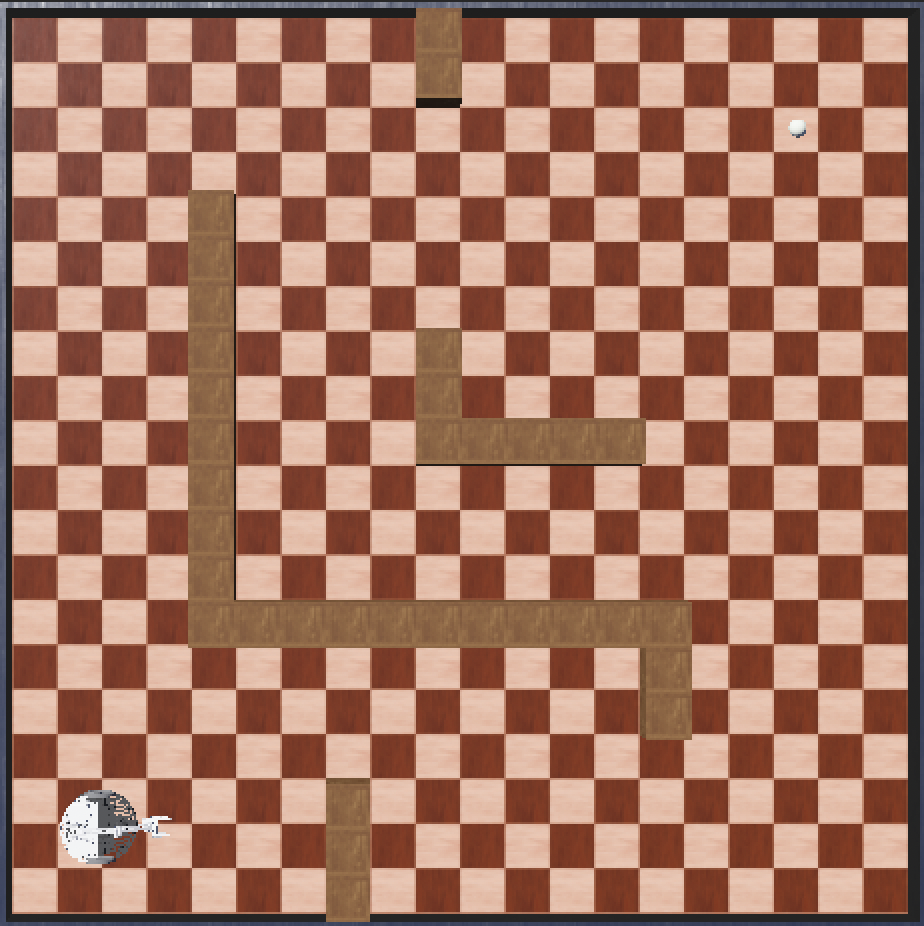

**Important parameters are as follows:**

1. The Romi begins at [x,y] = [0.2,0.2] meters in global coordinates
2. The ping pong ball is located at [xb,yb] = [1.75,1.75] meters.
3. A map of the Romi's environment is located in the A09_Starter controller folder. **This map may have to be modified using dilation before a path is planned**.
4. An implementation of Dijkstra's algorithm in Python is provided for your use.

## Goal

You will design a finite state machine, a feedback controller, and a path planning algorithm (using Dijkstra's and the raw map with any small modifications necessary) to make the Romi travel along an optimal path to get within reach of the ball. It will then grab the ball, return it to the **Romi's** initial start position, and drop it. 

## Reading Assignment

This assignment covers chapters 3, 11, and 13 of the textbook. It leverages your class notes and in-class exercises as well.


## Requirements

You should write your code in such a way that the Romis we have in the lab can perform the task. This means that you should not be adding extra sensors to the robot, but **you may use the Week 12 Romi in Webots, which includes a forward-facing camera.** You are not required to use a camera for this assignment, but it may help you grab the ball reliably if you leverage our Week 12 lecture topics. Your points for this assignment's technical content will be as follows:

* FSM 10 points
* Feedback controller 10 points
* Path Planning 10 points (including map dilation and other modifications as appropriate)
* Completion of the task 10 points (with partial credit, roughly broken down into performance before and after the grab)
* Kinematic calculations and considerations associated with choosing a correct goal position for the Romi and actually grabbing the ball: 10 points

**Your Finite State Machine must:**
* Keep the claw open and out of the way when traversing the map so that it doesn't "kick" the ball on arrival.
* Lower the claw and grab the ball when the correct position is reached. Do not use any sensors other than the map and the Romi's GPS and IMU to orient the robot in order to grab the ball.
* Use states as necessary to keep track of what the Romi is supposed to be doing.

**Your Feedback Control Code Must:**
* Accurately map desired speed and yaw rate of the Romi to wheel speeds (your $\vec{\dot{q}}$ must be correct given your desired $\vec{\nu}$).
* Smoothly follow an array of goal points provided by your path planner
* Employ any "if" statements or other logic necessary to provide accurate tracking.
* Control yaw **only** to align the claw with the ball on arrival to the goal position.

**Your Kinematic Considerations Must Include:**
* Choosing an appropriate goal for the Romi given the geometry of the arm and the possibility for yaw misalignment of the Romi on arrival to the goal. 
* Calculation of an appropriate yaw goal for the Romi on arrival to said goal.
* You may assume that the arm's relevant geometry is just as a fixed protrusion from the Romi's body of a known length. You do not have to model its linkage for this assignment. 

**Your Path Planner Must**
* Leverage the python Dijkstra implementation we used in class
* Dilate and update the map to avoid Romi hitting a wall before a path is planned.

## Deliverables

You will begin with the Week09_Starter and Week09_Supervisor codes that are pre-loaded in the Week09_World.wbt world. You will need to modify these using your in-class exercises from the past few weeks. note that the Week 9 supervisor code provides positions for the ping pong ball as well as the Romi. The starter controller for the Romi includes GPS and IMU sensors so that you can track and use global estimates of the Romi in your code. **The Romi Control code DOES NOT** give you live estimates of ping pong ball position; you will need to trust your a priori knowledge of the ball's location (for now). In the coming weeks we will discuss basic strategies for recognizing the ball in the Romi's environment in real time.

### Simulation 1 Video (10 points)

Record a video of your Romi performing the task.

### Simulation 2 Video (5 points)

Modifying the A09 supervisor to set the generateWorldUsingMapImage to True, create a NEW map with a NEW ping pong ball, and show that your code works under different circumstances. Record a video. **NOTE:** You will need to make a copy of the A09 world and delete all of the obstacles from it before completing this part!

### Writeup (10 points)

Construct a Google Doc that uses an IEEE-like format (template available [here](https://docs.google.com/document/d/1BMLExxD-IPdg8BpoX1QPa5_iaZHdTEeQ5yxBzSZsEWo/edit)). The document should contain headings:

1. Introduction (introduce the problem and your solution)
1. FSM Design
2. Feedback Control Design
3. Kinematic Considerations
4. Path Planning Considerations
5. Results and Discussion

In each section, provide a *complete* (with figures and equations) description of your solution and the steps you took. This document should provide enough information for me to grade you on the technical content without looking at your code! In the Results section, be sure to plot the Romi's position and the ball's position during the experiments you ran, and discuss the successes and challenges of your approach. **You will be graded on your presentation of your work** so choose key figures, tables, and equations wisely when crafting your document. This document will not be graded as process writing, but it will be a chance for you to get feedback on your technical writing for figures, equations, etc. before your final project report!